## Predicting Bike Rentals

For this project, we will try to predict the total number of bikes people rented in a given hour through a few different machine learning models at the same time we evaluate their performance.

Many U.S. cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day. This data has been compiled into a CSV file accesible from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

### 1. Analyzing the dataset

Firstly a short description of the relevant columns is provided:

    - instant - A unique sequential ID number for each row
    - dteday - The date of the rentals
    - season - The season in which the rentals occurred
    - yr - The year the rentals occurred
    - mnth - The month the rentals occurred
    - hr - The hour the rentals occurred
    - holiday - Whether or not the day was a holiday
    - weekday - The day of the week (as a number, 0 to 7)
    - workingday - Whether or not the day was a working day
    - weathersit - The weather (as a categorical variable)
    - temp - The temperature, on a 0-1 scale
    - atemp - The adjusted temperature
    - hum - The humidity, on a 0-1 scale
    - windspeed - The wind speed, on a 0-1 scale
    - casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
    - registered - The number of registered riders (people who had already signed up)
    - cnt - The total number of bike rentals (casual + registered)

After this, we can output the first few rows of the dataset to check all the current features and target. Our main goal will be to predict the `cnt` column.

In [1]:
import pandas

bike_rentals = pandas.read_csv("bike_rental_hour.csv")
bike_rentals.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


We will create a histogram of our target column to check its current distribution. After that, we will explore how much each one of the features is correlated with our target column.

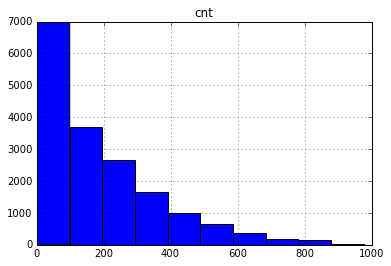

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

hist = bike_rentals.hist(column=['cnt'])
plt.show()

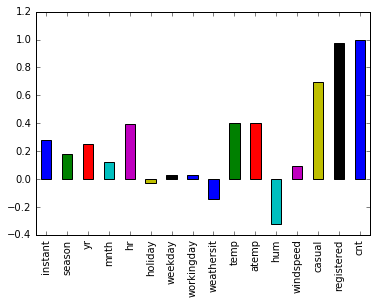

In [10]:
correlation = bike_rentals.corr(method='pearson')['cnt']
bar = correlation.plot.bar()
plt.show()

As per the results, we can check how important is each one of the features in order to obtain our main goal. In this case, we can see that `casual` and `registered` columns are the ones more related with our target column, as expected. At the opposite, columns like `holiday` or `weekday` are barely correlated with our target.

### 2. Preprocessing the dataset

It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information or distilling existing information.

On example of this is that the `hr` column in `bike_rentals` contains the hours during which bikes are rented, from 1 to 24. A machine treats each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for `morning`, `afternoon`, `evening`, and `night`. This bundles similar times together, enabling the model to make better decisions.

In [15]:
def assign_label(hour):
    """
    Function to assign a categorical label (0 to 4) to each one of the numeric 24-hours. 
    1 - morning
    2 - afternoon
    3 - evening
    4 - night
    """
    if hour < 6:
        return 4
    elif 6 <= hour < 12:
        return 1
    elif 12 <= hour < 18:
        return 2
    else:
        return 3
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals.head(24)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


Before we can begin applying machine learning algorithms, we'll need to split the data into training and testing sets. This will enable us to train an algorithm using the training set, and evaluate its accuracy on the testing set. If we train an algorithm on the training data, then evaluate its performance on the same data, we can get an unrealistically low error value, due to overfitting.

For evaluation purpose, we will choose the mean squared error metric as it makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [20]:
# Splitting data

percent_distribution = .8

train = bike_rentals.sample(frac=percent_distribution, random_state=42)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

print('Train lenght: ', len(train))
print('Test lenght: ', len(test))

Train lenght:  13903
Test lenght:  3476


### 3. Linear regression model

Linear regression works fairly well on this data, given that many of the columns are highly correlated with `cnt`.

Linear regression works best when predictors are linearly correlated to the target and also independent -- in other words, they don't change meaning when we combine them with each other. The good thing about linear regression is that it's fairly resistant to overfitting because it's straightforward. It also can be prone to underfitting the data, however, and not building a powerful enough model. This means that linear regression usually isn't the most accurate option.

We'll need to ignore the `casual` and `registered` columns because `cnt` is derived from them.

In [22]:
# Creating predictors (selected features) 

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

# Creating datasets

X_train = train[predictors]
y_train = train['cnt']
X_test = test[predictors]
y_test = test['cnt']

# Linear regression model

import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

# Computing error

from sklearn.metrics import mean_squared_error

lr_error = mean_squared_error(y_true=y_test, y_pred=lr_predictions)
print('Linear regression MSE: ', lr_error)

Linear regression MSE:  17968.20632787922


As seen, the error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.


### 4. Decision Tree model

Decision trees tend to predict outcomes much more reliably than linear regression models, because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

In [39]:
# Decision Tree model

from sklearn.tree import DecisionTreeRegressor

dt_errors = {}
min_samples_leaf = [1, 2, 5, 10, 15, 20]
min_samples_split = [1, 2, 5, 10, 15, 20]
max_depth = range(1, 21)

for value_leaf in min_samples_leaf:
    for value_split in min_samples_split:
        for value_depth in max_depth:
            dt = DecisionTreeRegressor(random_state=42, min_samples_leaf=value_leaf, min_samples_split=value_split, max_depth=value_depth)
            dt.fit(X_train, y_train)
            dt_predictions = dt.predict(X_test)
            dt_error = mean_squared_error(y_true=y_test, y_pred=dt_predictions)
            dt_errors[value_leaf, value_split, value_depth] = dt_error

# Select best model

selected = min(dt_errors, key=dt_errors.get)
print('\nBest model: {}\nDecision Tree Regressor MSE: {}'.format(selected, dt_errors[selected]))


Best model: (5, 20, 19)
Decision Tree Regressor MSE: 2513.8432741546403


By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

The best model is obtained with the parameters:

    - min_samples_leaf = 5
    - min_samples_split = 20
    - max_depth = 19
    
### 5. Random Forest model

Random forests tend to be much more accurate than simple models like linear regression. Due to the way random forests are constructed, they tend to overfit much less than decision trees. Random forests are prone to overfitting, so it's important to tune parameters like maximum depth and minimum samples per leaf.

In [40]:
# Random Forest model

from sklearn.ensemble import RandomForestRegressor

rf_errors = {}
min_samples_leaf = [1, 2, 5, 10, 15, 20]
min_samples_split = [1, 2, 5, 10, 15, 20]
max_depth = range(1, 21)

for value_leaf in min_samples_leaf:
    for value_split in min_samples_split:
        for value_depth in max_depth:
            rf = RandomForestRegressor(random_state=42, min_samples_leaf=value_leaf, min_samples_split=value_split, max_depth=value_depth)
            rf.fit(X_train, y_train)
            rf_predictions = rf.predict(X_test)
            rf_error = mean_squared_error(y_true=y_test, y_pred=rf_predictions)
            rf_errors[value_leaf, value_split, value_depth] = rf_error
            
# Select best model

selected = min(rf_errors, key=rf_errors.get)
print('\nBest model: {}\nRandom Forest Regressor MSE: {}'.format(selected, rf_errors[selected]))


Best model: (1, 5, 19)
Random Forest Regressor MSE: 1842.7636677697067


By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.

The best model is obtained with the parameters:

    - min_samples_leaf = 1
    - min_samples_split = 5
    - max_depth = 19

Finally, we will change the number of trees in the forest to obtain the best overall model.

In [41]:
# Random Forest model

rf = RandomForestRegressor(random_state=42, n_estimators=1000, min_samples_leaf=1, min_samples_split=5, max_depth=19)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Computing error

rf_error = mean_squared_error(y_true=y_test, y_pred=rf_predictions)
print('Random Forest MSE: ', rf_error)

Random Forest MSE:  1721.1970499836302


### 6. What if we remove the noise?

Previously, we have seen that some columns are barely correlated with the target column. We proceed to remove these columns to check if the general perfomance of the algorithms improve or not.

In [42]:
# Creating new predictors (selected features) 

new_predictors = list(train.columns)
new_predictors.remove("cnt")
new_predictors.remove("casual")
new_predictors.remove("registered")
new_predictors.remove("dteday")
new_predictors.remove("holiday")
new_predictors.remove("weekday")
new_predictors.remove("workingday")
new_predictors.remove("mnth")
new_predictors.remove("windspeed")

# Creating datasets

X_train = train[new_predictors]
y_train = train['cnt']
X_test = test[new_predictors]
y_test = test['cnt']

# Random Forest model

rf = RandomForestRegressor(random_state=42, n_estimators=1000, min_samples_leaf=1, min_samples_split=5, max_depth=19)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Computing error

rf_error = mean_squared_error(y_true=y_test, y_pred=rf_predictions)
print('Random Forest MSE: ', rf_error)

Random Forest MSE:  6981.839606500547


We can conclude that the accuracy does not improve, and, following this, the best model is obtained with all the features into account, even the ones that are barely correlated with our target column.